C:\Users\sunabove\AppData\Local\Temp\ipykernel_46040\502306695.py:23: RuntimeWarning: invalid value encountered in divide
  hue[mask & (c_max == r)] = (60 * ((g - b) / c_delta)[mask & (c_max == r)] + 360) % 360
C:\Users\sunabove\AppData\Local\Temp\ipykernel_46040\502306695.py:24: RuntimeWarning: invalid value encountered in divide
  hue[mask & (c_max == g)] = (60 * ((b - r) / c_delta)[mask & (c_max == g)] + 120) % 360
C:\Users\sunabove\AppData\Local\Temp\ipykernel_46040\502306695.py:25: RuntimeWarning: invalid value encountered in divide
  hue[mask & (c_max == b)] = (60 * ((r - g) / c_delta)[mask & (c_max == b)] + 240) % 360


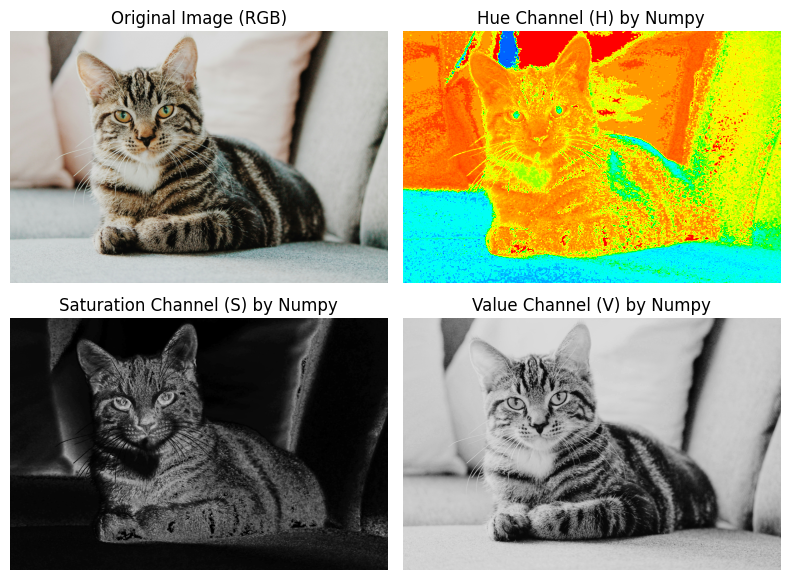

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. 이미지 읽기
image_bgr = cv2.imread('example.jpg')  # 이미지를 BGR로 읽기

# 2. BGR → RGB 변환
image_rgb = image_bgr[..., ::-1]  # NumPy 슬라이싱으로 채널 순서 변경

# 3. RGB 값을 [0, 1]로 정규화
image_rgb = image_rgb / 255.0
r, g, b = image_rgb[..., 0], image_rgb[..., 1], image_rgb[..., 2]

# 4. Max, Min 계산
c_max = np.max(image_rgb, axis=2)
c_min = np.min(image_rgb, axis=2)
c_delta = c_max - c_min

# 5. Hue 계산 (0으로 나누기 문제 처리)
hue = np.zeros_like(c_max)
mask = c_delta != 0  # delta가 0보다 큰 경우에만 계산
hue[mask & (c_max == r)] = (60 * ((g - b) / c_delta)[mask & (c_max == r)] + 360) % 360
hue[mask & (c_max == g)] = (60 * ((b - r) / c_delta)[mask & (c_max == g)] + 120) % 360
hue[mask & (c_max == b)] = (60 * ((r - g) / c_delta)[mask & (c_max == b)] + 240) % 360

# 6. Saturation 계산
saturation = np.zeros_like(c_max)
saturation[c_max != 0] = c_delta[c_max != 0] / c_max[c_max != 0]

# 7. Value 계산
value = c_max

# 8. HSV 이미지 결합
image_hsv = np.stack([hue, saturation, value], axis=-1)

# 9. 시각화 (Hue, Saturation, Value 채널)
rows, cols = 2, 2  # 출력 행렬 레이아웃 (1행, 4열)
chart_idx = 0

plt.figure(figsize=(4 * cols, 3 * rows))

# 원본 이미지
plt.subplot(rows, cols, chart_idx := chart_idx + 1)
plt.imshow(image_rgb)
plt.title("Original Image (RGB)")
plt.axis('off')

# Hue 채널
plt.subplot(rows, cols, chart_idx := chart_idx + 1)
plt.imshow(hue, cmap='hsv' )
plt.title("Hue Channel (H) by Numpy")
plt.axis('off')

# Saturation 채널
plt.subplot(rows, cols, chart_idx := chart_idx + 1)
plt.imshow(saturation, cmap='gray', vmin=0, vmax=1)
plt.title("Saturation Channel (S) by Numpy")
plt.axis('off')

# Value 채널
plt.subplot(rows, cols, chart_idx := chart_idx + 1)
plt.imshow(value, cmap='gray', vmin=0, vmax=1)
plt.title("Value Channel (V) by Numpy")
plt.axis('off')

plt.tight_layout()
plt.show()
